## Exercici 1
Descarrega el dataset adjunt, de registres de publicacions a Facebook sobre Tailàndia, i classifica els diferents registres utilitzant l'algorisme de K-means.

 Important: Tingues en compte que prèviament et caldrà preparar el dataset.

In [47]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import shapiro
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

df = pd.read_csv('Documents/Publicacions Facebook Thailandia.csv')
df

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0,NaN,NaN,NaN,NaN
7046,1050855161656896_1061334757275603,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0,NaN,NaN,NaN,NaN
7047,1050855161656896_1060126464063099,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0,NaN,NaN,NaN,NaN
7048,1050855161656896_1058663487542730,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

- status_id: Esta variable parece representar un identificador único para cada estado o publicación.
- status_type: Probablemente representa el tipo de estado, como texto, foto, video, etc.
- status_published: contiene la marca de tiempo o fecha en que se publicó el estado.
- num_reactions:  representa el número de reacciones que recibió el estado. Parece ser una variable de recuento.
- num_comments: Similar a num_reactions, representa el número de comentarios que recibió el estado.
- num_shares: representa el número de veces que se compartió el estado.
- num_likes, num_loves, num_wows, num_hahas, num_sads, num_angrys: Estas son todas variable que representan el recuento de diferentes tipos de reacciones (me gusta, encanta, sorprende, jaja, triste, enojado) que recibió el estado.
- Column1, Column2, Column3, Column4: Estas columnas parecen estar presentes, pero actualmente no contienen ningún valor (todas tienen 0 entradas no nulas).  Es posible que estas columnas se hayan agregado por alguna razón, pero actualmente no contienen datos.

In [6]:
df.isnull().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

In [7]:
df.isna().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

In [8]:
df.duplicated().sum()

51

In [9]:
df.nunique()

status_id           6997
status_type            4
status_published    6913
num_reactions       1067
num_comments         993
num_shares           501
num_likes           1044
num_loves            229
num_wows              65
num_hahas             42
num_sads              24
num_angrys            14
Column1                0
Column2                0
Column3                0
Column4                0
dtype: int64

- Las últimas cuatro columnas (Column1 a Column4) parecen estar presentes pero actualmente vacías, se pueden excluir del análisis.
- hay 51 duplicados que también eliminaremos.
- status_id no es necesaria para el analisis 
- status_types crearemos dummies
- finalmente realizaremos estandarización

In [10]:
# Eliminar duplicats
df.drop_duplicates(subset='status_id', inplace=True)
df.duplicated().sum()

0

In [11]:
df = df.drop(['status_id', 'Column1', 'Column2', 'Column3', 'Column4'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6997 entries, 0 to 7049
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_type       6997 non-null   object
 1   status_published  6997 non-null   object
 2   num_reactions     6997 non-null   int64 
 3   num_comments      6997 non-null   int64 
 4   num_shares        6997 non-null   int64 
 5   num_likes         6997 non-null   int64 
 6   num_loves         6997 non-null   int64 
 7   num_wows          6997 non-null   int64 
 8   num_hahas         6997 non-null   int64 
 9   num_sads          6997 non-null   int64 
 10  num_angrys        6997 non-null   int64 
dtypes: int64(9), object(2)
memory usage: 656.0+ KB


#### dummies

In [12]:
df = pd.get_dummies(df, columns=['status_type'], drop_first=True, dtype= int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6997 entries, 0 to 7049
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   status_published    6997 non-null   object
 1   num_reactions       6997 non-null   int64 
 2   num_comments        6997 non-null   int64 
 3   num_shares          6997 non-null   int64 
 4   num_likes           6997 non-null   int64 
 5   num_loves           6997 non-null   int64 
 6   num_wows            6997 non-null   int64 
 7   num_hahas           6997 non-null   int64 
 8   num_sads            6997 non-null   int64 
 9   num_angrys          6997 non-null   int64 
 10  status_type_photo   6997 non-null   int32 
 11  status_type_status  6997 non-null   int32 
 12  status_type_video   6997 non-null   int32 
dtypes: int32(3), int64(9), object(1)
memory usage: 683.3+ KB


In [13]:
df

,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type_photo,status_type_status,status_type_video
0,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,0,0,1
1,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,1,0,0
2,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,0,0,1
3,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,1,0,0
4,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,9/24/2016 2:58,89,0,0,89,0,0,0,0,0,1,0,0
7046,9/23/2016 11:19,16,0,0,14,1,0,1,0,0,1,0,0
7047,9/21/2016 23:03,2,0,0,1,1,0,0,0,0,1,0,0
7048,9/20/2016 0:43,351,12,22,349,2,0,0,0,0,1,0,0


#### outliers

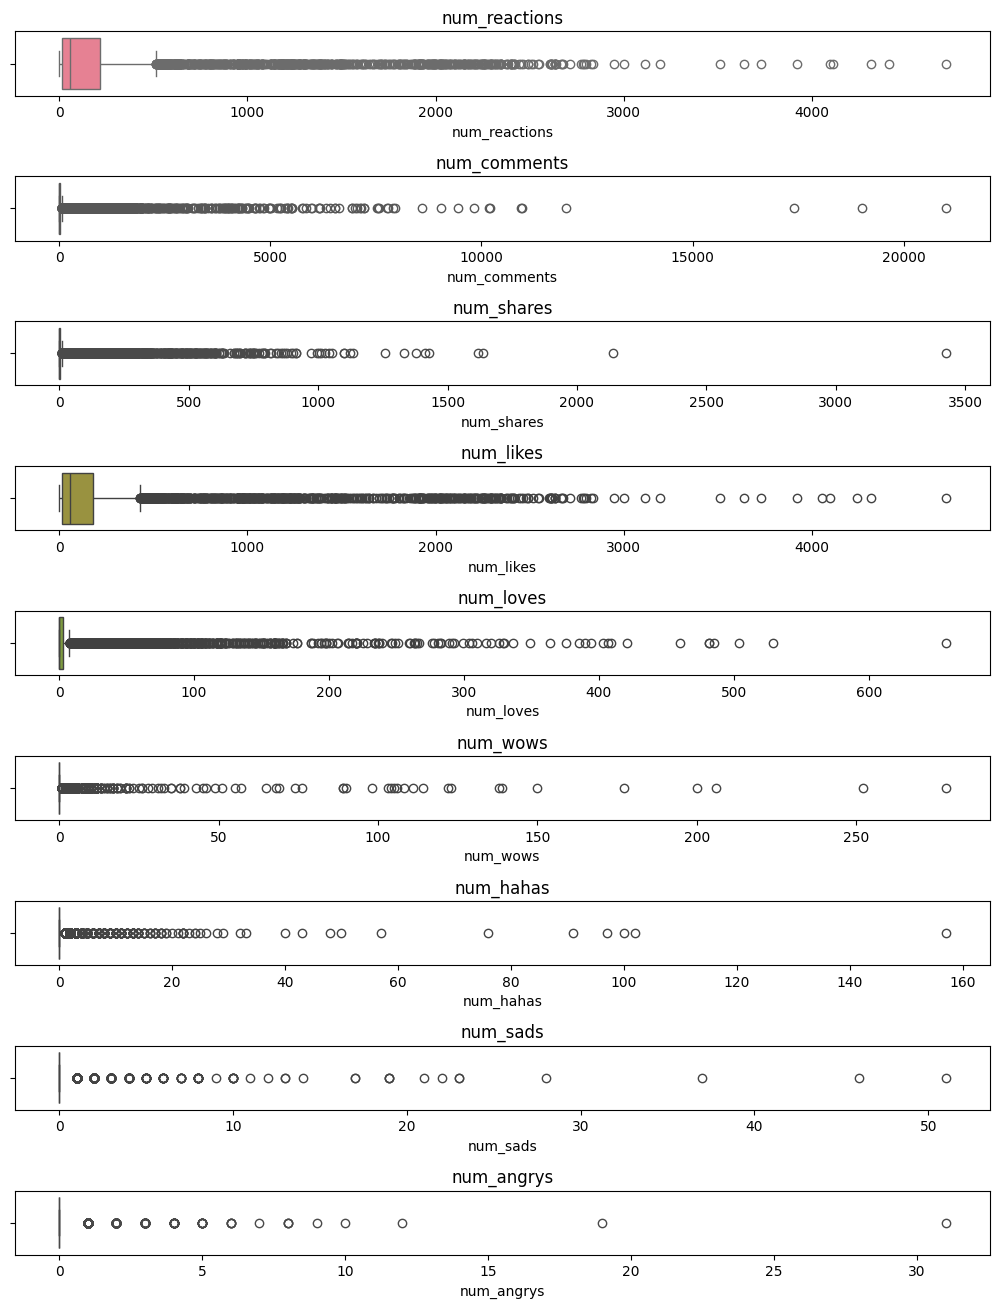

In [14]:
df_int = df[['num_reactions', 'num_comments',
       'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas',
       'num_sads', 'num_angrys']]

plt.figure(figsize=(20, 20))
palette = sns.color_palette("husl", n_colors=14)

for i, column in enumerate(df_int.columns):
    plt.subplot(14, 2, 2*i + 1)
    sns.boxplot(x=df[column], orient="h",color=palette[i])
    plt.title(f'{column}')
    plt.tight_layout()

Todas las variable tienen outliers

#### prueba normalidad

In [15]:
H0 = "Los datos de la variable siguen una distribución normal"
H1 = "Los datos de la variable NO siguen una distribución normal"

for i in df_int.columns:
    stat, p = shapiro(df[column])
    alpha = 0.05
    if p > alpha:
        print(f'Los datos de la variable {i} siguen una distribución normal.')
    else:
        print(f'Los datos de la variable {i} NO siguen una distribución normal.')
 
   

Los datos de la variable num_reactions NO siguen una distribución normal.
Los datos de la variable num_comments NO siguen una distribución normal.
Los datos de la variable num_shares NO siguen una distribución normal.
Los datos de la variable num_likes NO siguen una distribución normal.
Los datos de la variable num_loves NO siguen una distribución normal.
Los datos de la variable num_wows NO siguen una distribución normal.
Los datos de la variable num_hahas NO siguen una distribución normal.
Los datos de la variable num_sads NO siguen una distribución normal.
Los datos de la variable num_angrys NO siguen una distribución normal.


C:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Ninguna de la variables sigue una distribución normal.


usaremos RobustScaler para estandarizar las variables ya que que no siguen una distribución normal y tienen outliers.

In [16]:
robust_scaler = RobustScaler()
variables_con_outliers = ['num_reactions', 'num_comments',
       'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas',
       'num_sads', 'num_angrys'] 
df[variables_con_outliers] = robust_scaler.fit_transform(df[variables_con_outliers])
df

,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type_photo,status_type_status,status_type_video
0,4/22/2018 6:00,2.366834,23.090909,65.50,2.272727,30.666667,3.0,1.0,1.0,0.0,0,0,1
1,4/21/2018 22:45,0.462312,-0.181818,0.00,0.563636,0.000000,0.0,0.0,0.0,0.0,1,0,0
2,4/21/2018 6:17,0.849246,10.545455,14.25,0.890909,7.000000,1.0,1.0,0.0,0.0,0,0,1
3,4/21/2018 2:29,0.266332,-0.181818,0.00,0.327273,0.000000,0.0,0.0,0.0,0.0,1,0,0
4,4/18/2018 3:22,0.778894,-0.181818,0.00,0.890909,3.000000,0.0,0.0,0.0,0.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,9/24/2016 2:58,0.155779,-0.181818,0.00,0.193939,0.000000,0.0,0.0,0.0,0.0,1,0,0
7046,9/23/2016 11:19,-0.211055,-0.181818,0.00,-0.260606,0.333333,0.0,1.0,0.0,0.0,1,0,0
7047,9/21/2016 23:03,-0.281407,-0.181818,0.00,-0.339394,0.333333,0.0,0.0,0.0,0.0,1,0,0
7048,9/20/2016 0:43,1.472362,0.363636,5.50,1.769697,0.666667,0.0,0.0,0.0,0.0,1,0,0


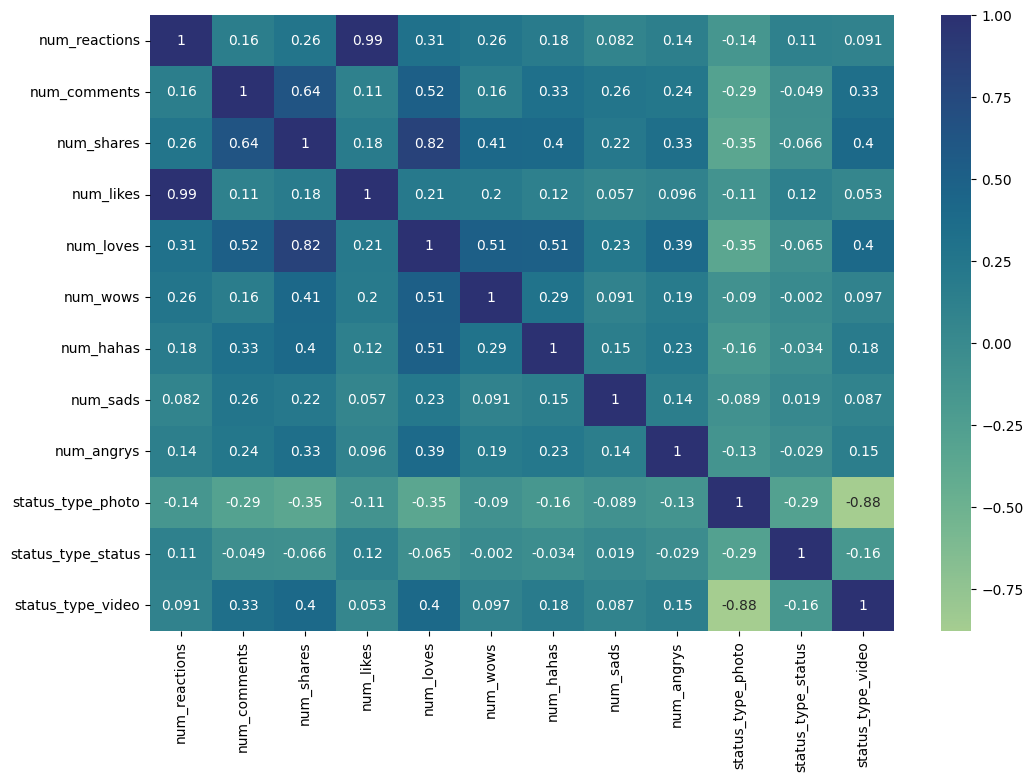

In [17]:
corr = df[['num_reactions','num_comments','num_shares',
           'num_likes','num_loves','num_wows','num_hahas','num_sads','num_angrys',
           'status_type_photo','status_type_status','status_type_video']].corr()


plt.figure(figsize=(12,8))
sns.heatmap(corr,cmap="crest",annot=True);


In [18]:
pca = PCA().fit(df_int)
explained_variance = pca.explained_variance_ratio_
print("Varianza explicada por cada componente principal:", explained_variance)

Varianza explicada por cada componente principal: [6.74071107e-01 3.16179904e-01 9.01430406e-03 6.66418937e-04
 5.45160493e-05 1.13832264e-05 1.99193787e-06 3.74381726e-07
 8.16156680e-10]


explained_variance_ratio_ nos proporciona la proporción de la varianza total explicada por cada componente principal. Este paso te ayudará a entender cuánta información se conserva en cada componente principal

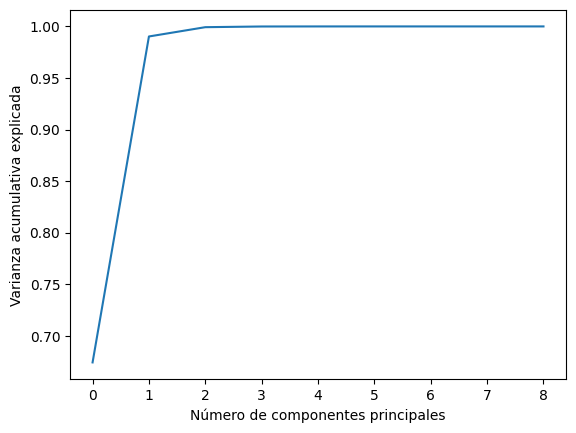

In [19]:
cumulative_explained_variance = np.cumsum(explained_variance)
plt.plot(cumulative_explained_variance)
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza acumulativa explicada')
plt.show()

Este gráfico permite visualizar cuánta varianza acumulativa se conserva al considerar diferentes números de componentes principales. Puede ayudarte a decidir cuántos componentes principales retener.

Basándonos en el gráfico, se puede decidir cuántos componentes principales retener para cumplir con los requisitos de varianza explicada.

In [20]:
pca = PCA(n_components=3)
pca_num = pca.fit_transform(df_int)
df_pca = pd.DataFrame(data=pca_num, columns=[f'Componente Principal {i+1}' for i in range(3)])
df_pca


,Componente Principal 1,Componente Principal 2,Componente Principal 3
0,370.680264,318.513435,199.885223
1,-242.153241,-54.029698,-18.163153
2,11.614129,-4.216771,18.023451
3,-251.910292,-108.281029,-16.307086
4,-227.171051,27.476559,-17.372309
...,...,...,...
6992,-257.414270,-138.884344,-15.260074
6993,-275.873486,-241.802100,-11.183498
6994,-279.266578,-260.587712,-10.698605
6995,-178.168471,222.333487,-7.387002


In [21]:
df_dummies = df[['status_type_photo', 'status_type_status', 'status_type_video']]
df_dummies.reset_index(drop=True, inplace=True)
df_pca.reset_index(drop=True, inplace=True)
df_kmeans = pd.concat([df_dummies, df_pca], axis=1)
df_kmeans

,status_type_photo,status_type_status,status_type_video,Componente Principal 1,Componente Principal 2,Componente Principal 3
0,0,0,1,370.680264,318.513435,199.885223
1,1,0,0,-242.153241,-54.029698,-18.163153
2,0,0,1,11.614129,-4.216771,18.023451
3,1,0,0,-251.910292,-108.281029,-16.307086
4,1,0,0,-227.171051,27.476559,-17.372309
...,...,...,...,...,...,...
6992,1,0,0,-257.414270,-138.884344,-15.260074
6993,1,0,0,-275.873486,-241.802100,-11.183498
6994,1,0,0,-279.266578,-260.587712,-10.698605
6995,1,0,0,-178.168471,222.333487,-7.387002


### k-means

In [27]:
from sklearn.cluster import KMeans, AgglomerativeClustering

In [32]:
kmeans = KMeans(init="random", n_clusters=3, n_init=10, max_iter=300, random_state=42)
kmeans.fit(df_kmeans)
pred = kmeans.predict(df_kmeans)


In [33]:
df_kmeans['Clusters'] = pred


In [34]:
#principales aspectos del kmean

print("El SSE más bajo es", kmeans.inertia_)
print("Las localizaciones de los centroides son:" , kmeans.cluster_centers_)
print("El número de iteraciones hasta alcanzar la convergencia fue", kmeans.n_iter_)
print(df_kmeans['Clusters'].value_counts())

El SSE más bajo es 2685495234.8604784
Las localizaciones de los centroides son: [[ 6.31084677e-01  4.36688058e-02  3.17577086e-01 -1.43432139e+02
  -1.34064580e+02  1.76841941e-01]
 [ 7.35294118e-03  6.93889390e-18  9.92647059e-01  5.08933435e+03
  -6.23416100e+02 -7.85476502e+01]
 [ 4.42796610e-01  1.69491525e-01  3.58050847e-01  4.75081487e+02
   1.99432880e+03  2.02386383e+01]]
El número de iteraciones hasta alcanzar la convergencia fue 12
Clusters
0    6389
2     472
1     136
Name: count, dtype: int64


Dado que se ha aplicado PCA (Análisis de Componentes Principales) para reducir la dimensionalidad de los datos a tres componentes principales, se puede visualizar los clústeres en un gráfico tridimensional. 

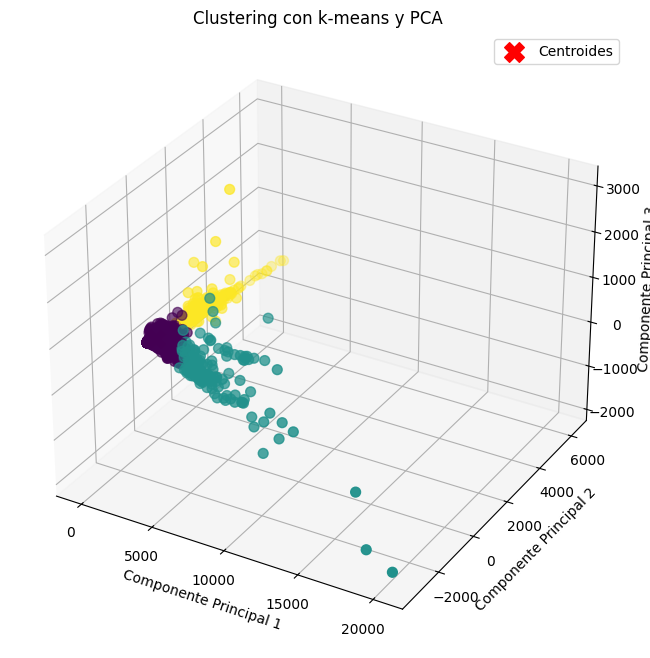

In [35]:
from mpl_toolkits.mplot3d import Axes3D


# Graficar en 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Puntos coloreados por clúster
scatter = ax.scatter(df_kmeans['Componente Principal 1'], df_kmeans['Componente Principal 2'], df_kmeans['Componente Principal 3'],
                     c=df_kmeans['Clusters'], cmap='viridis', s=50)

# Marcadores de centroides
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2],
           marker='X', s=200, color='red', label='Centroides')

ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_zlabel('Componente Principal 3')
ax.set_title('Clustering con k-means y PCA')
ax.legend()

plt.show()

podemos observar los clusters generados con algunos más dispersos y otros mas concentrados

## Exercici 2
Classifica els diferents registres utilitzant l'algorisme de clustering jeràrquic.


In [43]:
df_jer = df_kmeans.drop('Clusters', axis=1)
df_jer

,status_type_photo,status_type_status,status_type_video,Componente Principal 1,Componente Principal 2,Componente Principal 3
0,0,0,1,370.680264,318.513435,199.885223
1,1,0,0,-242.153241,-54.029698,-18.163153
2,0,0,1,11.614129,-4.216771,18.023451
3,1,0,0,-251.910292,-108.281029,-16.307086
4,1,0,0,-227.171051,27.476559,-17.372309
...,...,...,...,...,...,...
6992,1,0,0,-257.414270,-138.884344,-15.260074
6993,1,0,0,-275.873486,-241.802100,-11.183498
6994,1,0,0,-279.266578,-260.587712,-10.698605
6995,1,0,0,-178.168471,222.333487,-7.387002


In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_matrix = linkage(df_jer, method='ward')
dendrogram(linkage_matrix)
plt.title('Dendrograma Jerárquico')
plt.show()

In [50]:
# Modelo clustering jerarquico:
jer = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
pred2 = jer.fit_predict(df_jer)
df_jer['Clusters2'] = pred2 
df_jer

,status_type_photo,status_type_status,status_type_video,Componente Principal 1,Componente Principal 2,Componente Principal 3,Clusters2
0,0,0,1,370.680264,318.513435,199.885223,0
1,1,0,0,-242.153241,-54.029698,-18.163153,0
2,0,0,1,11.614129,-4.216771,18.023451,0
3,1,0,0,-251.910292,-108.281029,-16.307086,0
4,1,0,0,-227.171051,27.476559,-17.372309,0
...,...,...,...,...,...,...,...
6992,1,0,0,-257.414270,-138.884344,-15.260074,0
6993,1,0,0,-275.873486,-241.802100,-11.183498,0
6994,1,0,0,-279.266578,-260.587712,-10.698605,0
6995,1,0,0,-178.168471,222.333487,-7.387002,0


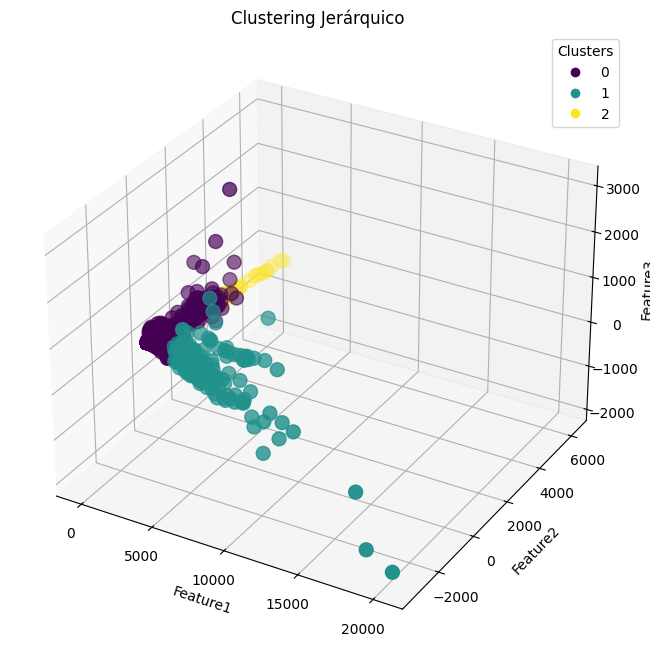

In [54]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df_jer['Componente Principal 1'], df_jer['Componente Principal 2'], df_jer['Componente Principal 3'], c=df_jer['Clusters2'], cmap='viridis', s=100)

# Configuraciones adicionales para el gráfico en 3D
ax.set_title('Clustering Jerárquico')
ax.set_xlabel('Feature1')
ax.set_ylabel('Feature2')
ax.set_zlabel('Feature3')
ax.legend(*scatter.legend_elements(), title='Clusters')

plt.show()

In [ ]:
el grafico obtenido es muy similar al obtenido con kmeans

## Exercici 3
Calcula el rendiment del clustering mitjançant un paràmetre com pot ser silhouette.

In [51]:
kmeans_silhouette = silhouette_score(df_kmeans, pred)
jer_silhouette = silhouette_score(df_jer, pred2)

print("Rendimiento Kmeans: {:.2f}%".format(kmeans_silhouette * 100))
print("Rendimiento Jerárquico: {:.2f}%".format(jer_silhouette * 100))

Rendimiento Kmeans: 81.32%
Rendimiento Jerárquico: 82.28%


In [ ]:
se puede observar que existe un leve mejor rendimiento con el metodo jerárquico